[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MarkNatavio/CSC448_Hello_Jupyter/blob/master/Array%20Based%20Neural%20Network.ipynb)

# Array Based Neural Network

This is an array based neural network that I made as a final project for my CSC 113xx Programming Language class. The task was essentially to create a python based weightless neural network that reads arrays of size 12 and outputs wether a 3x4 matrix created by the array would form an L or and H. For instance:

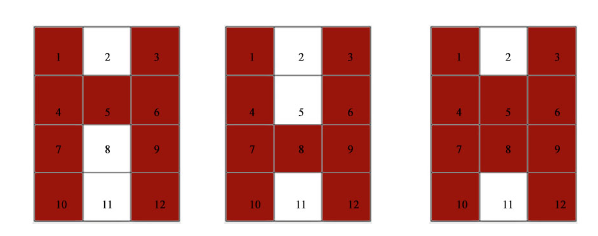

The way it works is there is a binary generator that creates binary strings of size 12 and stores them in the form of arrays. Every array possible is generated and stored in a file. This file is then accessed by the program and through an algorithm that compares which indexes are 1s (black boxes) and which indexes are 0s (white boxes) in order to determine wether we have an H or an L. Now the real challenge behind this is that the neural network is meant to detect not just the pattern of the examples above, but also misshapen Hs and Ls. This means that it is meant to also read images that ressemble and H or an L.

To tackle this project, my teamates and I did the following:
1) Create a binary generator to see all possible combinations.
2) An algorithm that reads the indexes, to which we planned by creating different case scenarios that we want to test for.
3) A test function that works as a performance measurement.

This was an extremely fun project to do. In the end our neural network had around a 98% precision.

# Code

In [ ]:
# CSc113 Final Project
# Mark Natavio (Section 2L) [mnatavi000@citymail.cuny.edu]
# Saiful Islam (Section 2N) [sislam008@citymail.cuny.edu]
# Tanzil Baraskar (Section 2N) [tbarask000@citymail.cuny.edu]

import random


class H: # performs machine learning for H
    T_1H = [0, 0, 0, 0, 0, 0, 0, 0]  # {0, 3, 6}
    T_2H = [0, 0, 0, 0, 0, 0, 0, 0]  # {1, 4, 7}
    T_3H = [0, 0, 0, 0, 0, 0, 0, 0]  # {2, 5, 8}
    T_4H = [0, 0, 0, 0, 0, 0, 0, 0]  # {9, 10, 11}


class L: # performs machine learning for L
    T_1L = [0, 0, 0, 0, 0, 0, 0, 0]  # {0, 3, 6}
    T_2L = [0, 0, 0, 0, 0, 0, 0, 0]  # {1, 4, 7}
    T_3L = [0, 0, 0, 0, 0, 0, 0, 0]  # {2, 5, 8}
    T_4L = [0, 0, 0, 0, 0, 0, 0, 0]  # {9, 10, 11}


def binary_to_array(binaryNum): # turn binary number into an array of 12 elements
    array = []
    binary = str(bin(binaryNum)) # turning binary number into a string (i.e. 0b0 -> "0b0")
    binary = binary[2:] # get rid of "0b" in beginning of binary number (i.e. "0b0" -> "0")
    while len(binary) < 12: # add necessary zeros to the front until string has 12 digits (i.e. "0" -> "00" -> "000" -> ... -> "000000000000"))
        binary = '0' + binary[:]
    for i in range(12): # turn string into an array of int elements
        array.append(int(binary[i]))
    return array


def creating_tuples(array): # breaking down into tuples of size n = 3
    return [(array[0], array[3], array[6]), (array[1], array[4], array[7]), (array[2], array[5], array[8]), (array[9], array[10], array[11])]


def black_pixels(array): # calculates the sum of black pixels
    sumOfBP = 0
    for i in array:
        sumOfBP += i
    return sumOfBP


def white_pixels(array): # calculates the sum of white pixels
    sumOfWP = 0
    for i in array:
        if i == 0:
            sumOfWP += 1
    return sumOfWP


def binary_to_decimal(binaryArray): # take elements in indices and turn it into a decimal (i.e. [1,0,1] -> 101 -> 5)
    number = (binaryArray[0] * 100) + (binaryArray[1] * 10) + binaryArray[2] # take elements in indices and turn it into a binary number (i.e. [1,0,1] -> 101)
    number = str(number) # turn binary number into a string (i.e. 101 -> "101")
    return int(number, 2) # turn binary number string into decimal number (i.e. "101" -> 5)


def incrementing_values_in_tuples(array, letter, h, l): # for every array in training set increase the values in the tuples
    tuples = creating_tuples(array)
    if (letter == 'H'):
        h.T_1H[binary_to_decimal(tuples[0])] += 1
        h.T_2H[binary_to_decimal(tuples[1])] += 1
        h.T_3H[binary_to_decimal(tuples[2])] += 1
        h.T_4H[binary_to_decimal(tuples[3])] += 1
    else:
        l.T_1L[binary_to_decimal(tuples[0])] += 1
        l.T_2L[binary_to_decimal(tuples[1])] += 1
        l.T_3L[binary_to_decimal(tuples[2])] += 1
        l.T_4L[binary_to_decimal(tuples[3])] += 1
    pass


def array_belongs_in_H(tupleOfArray): # checks to see if arrays belongs in class H
    if black_pixels(tupleOfArray[0]) >= 2 and black_pixels(tupleOfArray[1]) >= 1 and black_pixels(tupleOfArray[2]) >= 2 and black_pixels(tupleOfArray[3]) >= 1:
        if (tupleOfArray[1][1] == 1 or tupleOfArray[1][2] == 1) and (tupleOfArray[3][0] == 1 or tupleOfArray[3][2] == 1) and (tupleOfArray[1][0] == 0 or tupleOfArray[3][1] == 0):
            return True
        else:
            return False


def array_belongs_in_L(tupleOfArray): # checks to see if array belongs in class L
    if black_pixels(tupleOfArray[0]) >= 1 and white_pixels(tupleOfArray[1]) >= 2 and white_pixels(tupleOfArray[2]) >= 2 and black_pixels(tupleOfArray[3]) >= 2 and tupleOfArray[1][2] == 0 and tupleOfArray[2][0] == 0:
        return True
    else:
        return False


def dataset_to_text_file(trainingH, trainingL, testingH, testingL): # function that puts the training and testing data set into a text file
    with open("dataset.txt", 'w') as fileObject:
        fileObject.write("Training set for H:\n")
        for i in trainingH:
            fileObject.write(str(i) + "\n")
        fileObject.write("\nTraining set for L:\n")
        for i in trainingL:
            fileObject.write(str(i) + "\n")
        fileObject.write("\nTesting set for H:\n")
        for i in testingH:
            fileObject.write(str(i) + "\n")
        fileObject.write("\nTesting set for L:\n")
        for i in testingL:
            fileObject.write(str(i) + "\n")
    pass


def generating_and_training(h, l):
    trainingH = [] # stores training set for H
    trainingL = [] # stores training set for L
    testingH = [] # stores testing set for H
    testingL = [] # stores testing set for L
    counterForH = 0
    counterForL = 0
    for g in range(4096): # breaking down the binary to find all possible 12 bit binary numbers
        if counterForH == 300 and counterForL == 300:
            break
        array = binary_to_array(g) # turn binary number into an array of 12 elements
        tupleOfArray = creating_tuples(array) # create tuples from this array
        # check to see if array of tuples belongs in class H, L, or neither (if neither, then loop continues to next iteration)
        if array_belongs_in_H(tupleOfArray):
            if counterForH < 200:
                trainingH.append(array)
                incrementing_values_in_tuples(array, "H", h, l)
            elif counterForH < 300:
                testingH.append(array)
            counterForH += 1
        elif array_belongs_in_L(tupleOfArray):
            if counterForL < 200:
                trainingL.append(array)
                incrementing_values_in_tuples(array, "L", h, l)
            elif counterForL < 300:
                testingL.append(array)
            counterForL += 1
        else:
            continue
    dataset_to_text_file(trainingH, trainingL, testingH, testingL) # store datasets in text file
    return testingH, testingL # returns the data set that we will test on

def output(array, actualClass, predictedClass, h, l):
    global totalClasses
    global correctGuesses
    global wrongGuesses
    if (actualClass == predictedClass):
        sameClass = True
    else:
        sameClass = False
    print([array, "Actual Class:", actualClass,"Predicted Class:", predictedClass, sameClass])
    if (predictedClass == actualClass):
        totalClasses += 1
        correctGuesses += 1
        accuracy = (correctGuesses / totalClasses) * 100
        extra_credit(array, predictedClass, h, l, True) # for extra credit ONLY (does not affect program if commented out)
    else:
        totalClasses += 1
        wrongGuesses += 1
        accuracy = (correctGuesses / totalClasses) * 100
        extra_credit(array, predictedClass, h, l, False) # for extra credit ONLY (does not affect program if commented out)
    print("Accuracy ", accuracy, "%", "\n", sep="")


def testing(array, h, l, testingFor):
    for i in array:
        sumInH = 0
        sumInL = 0
        tuples = creating_tuples(i)
        sumInH += h.T_1H[binary_to_decimal(tuples[0])]
        sumInH += h.T_2H[binary_to_decimal(tuples[1])]
        sumInH += h.T_3H[binary_to_decimal(tuples[2])]
        sumInH += h.T_4H[binary_to_decimal(tuples[3])]
        sumInL += l.T_1L[binary_to_decimal(tuples[0])]
        sumInL += l.T_2L[binary_to_decimal(tuples[1])]
        sumInL += l.T_3L[binary_to_decimal(tuples[2])]
        sumInL += l.T_4L[binary_to_decimal(tuples[3])]
        if sumInH >= sumInL: # compare to see if array is more of an H or L
            predictedClass = "H"
        else:
            predictedClass = "L"
        if testingFor == "H":
            output(i, "H", predictedClass, h, l)
        else:
            output(i, "L", predictedClass, h, l)


# *********************************** EXTRA CREDIT ***********************************
# Hello Professor,
# To make things easier for you to read, we decided to create new functions for the EC
# opposed to reusing functions (less efficient, however, easier for you to read)


def extra_credit(array, predictedClass, h, l, incrementOrNot):
    # We experimented with different values of d, and we noticed that as d increased,
    # so did the accuracy.
    #
    # When the value of d was 0.1, the lowest accuracy we got was 82.35294117647058%.
    # When the value of d was 0.2, the lowest accuracy we got was 95%.
    # When the value of d was 0.3, the lowest accuracy we got was 100%.
    d = 0
    tuples = creating_tuples(array)
    if (incrementOrNot == True):
        if (predictedClass == 'H'):
            h.T_1H[binary_to_decimal(tuples[0])] += d
            h.T_2H[binary_to_decimal(tuples[1])] += d
            h.T_3H[binary_to_decimal(tuples[2])] += d
            h.T_4H[binary_to_decimal(tuples[3])] += d
        else:
            l.T_1L[binary_to_decimal(tuples[0])] += d
            l.T_2L[binary_to_decimal(tuples[1])] += d
            l.T_3L[binary_to_decimal(tuples[2])] += d
            l.T_4L[binary_to_decimal(tuples[3])] += d
    else:
        if (predictedClass == 'H'):
            h.T_1H[binary_to_decimal(tuples[0])] -= d
            h.T_2H[binary_to_decimal(tuples[1])] -= d
            h.T_3H[binary_to_decimal(tuples[2])] -= d
            h.T_4H[binary_to_decimal(tuples[3])] -= d
        else:
            l.T_1L[binary_to_decimal(tuples[0])] -= d
            l.T_2L[binary_to_decimal(tuples[1])] -= d
            l.T_3L[binary_to_decimal(tuples[2])] -= d
            l.T_4L[binary_to_decimal(tuples[3])] -= d
    pass
# ************************************************************************************


def main():
    global h
    global l
    global totalClasses
    global correctGuesses
    global wrongGuesses

    h = H() # creating an object of class H
    l = L() # creating an object of class L

    # Training
    testingH, testingL = generating_and_training(h, l) # testingH and testingL provide the dataset we will test

    # Testing
    totalClasses = 0
    correctGuesses = 0
    wrongGuesses = 0
    testing(testingH, h, l, "H") # testing for H with testingH
    testing(testingL, h, l, "L") # testing for L with testingL
    pass



# Artificial Intelligence Meme

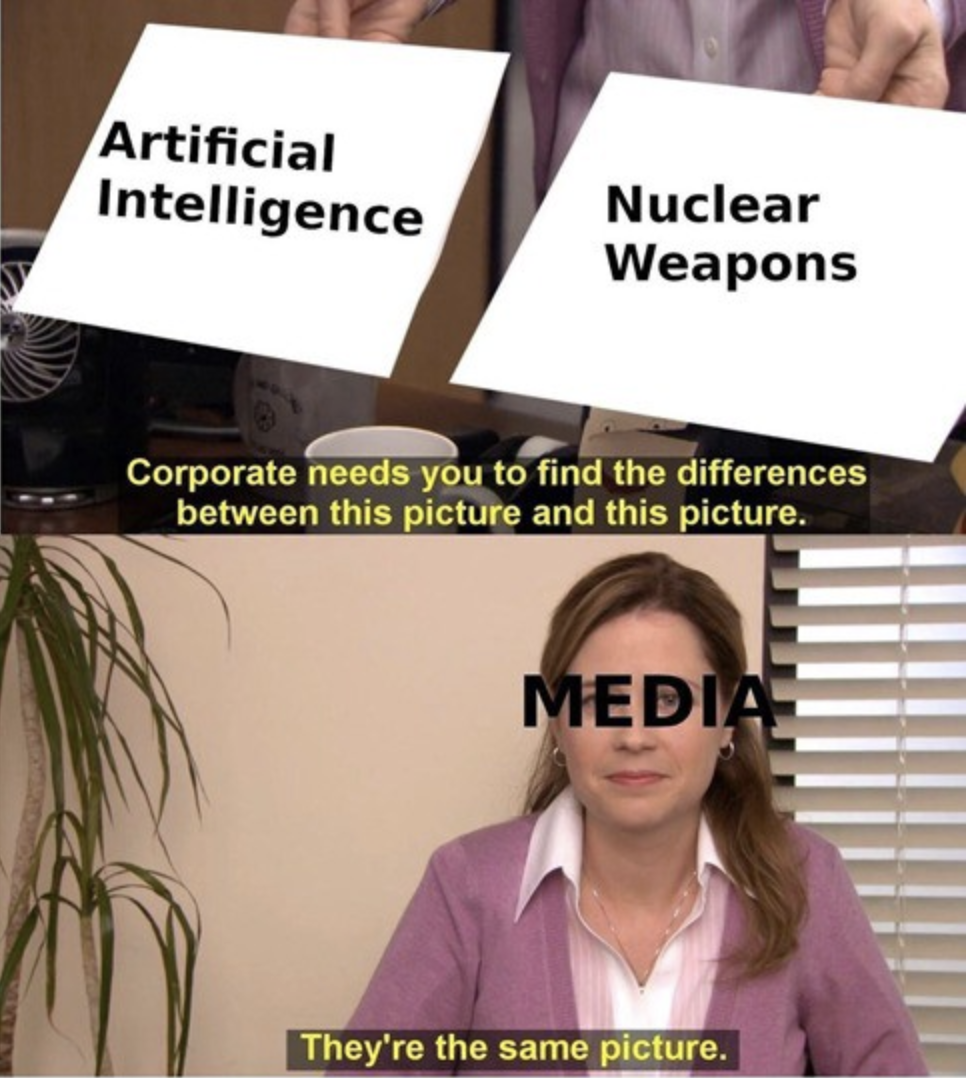